In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from pandas import read_excel
from scipy.optimize import curve_fit
import math

Importação de dados

In [7]:
df = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='Dados', header=None, names=['A', 'B', 'C', 'D','E', 'F'])
df = df.replace({',': '.'}, regex=True)
df


,A,B,C,D,E,F
0,2.5,18,10,9,3,0
1,2.6,17,7,9,2,0
2,2.7,3,5,11,0,0
3,2.8,3,12,3,4,1
4,2.9,20,12,5,4,2
...,...,...,...,...,...,...
271,29.6,17,11,10,6,0
272,29.7,25,11,7,7,0
273,29.8,20,9,5,6,3
274,29.9,26,15,22,7,4


Plot 35KV, 30KV, 28KV, 25KV, 18KV

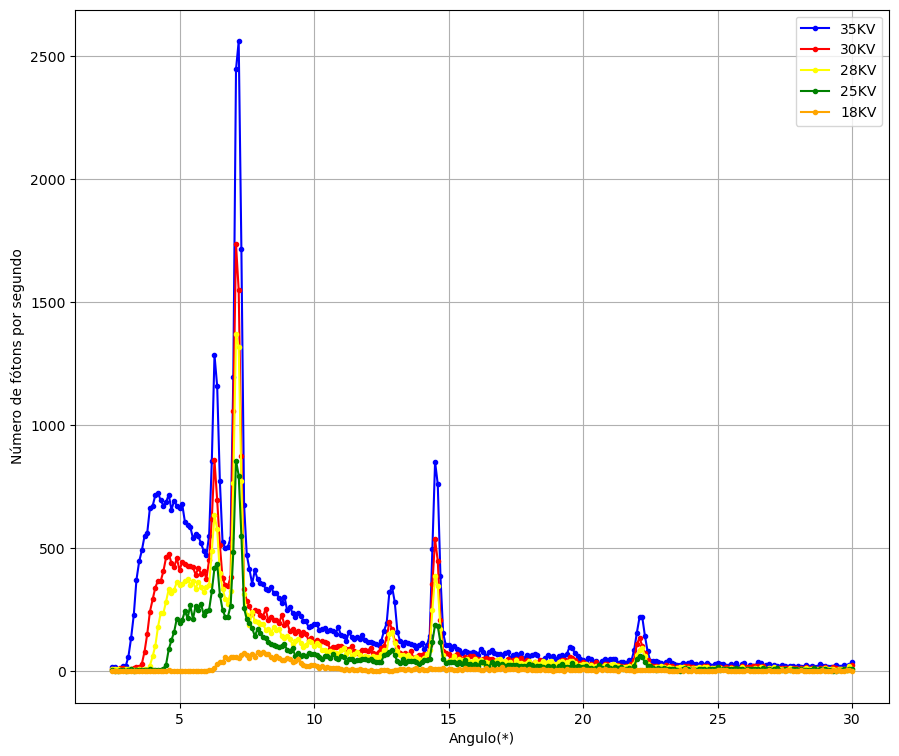

In [19]:
plt.figure(figsize=(10.5, 9))

plt.plot(df['A'], df['B'], label='35KV', marker='.', color='Blue')
plt.plot(df['A'], df['C'], label='30KV', marker='.', color='Red')
plt.plot(df['A'], df['D'], label='28KV', marker='.', color='Yellow')
plt.plot(df['A'], df['E'], label='25KV', marker='.', color='Green')
plt.plot(df['A'], df['F'], label='18KV', marker='.', color='Orange')
plt.xlabel('Angulo(*)')
plt.ylabel('Número de fótons por segundo')
plt.grid()
plt.legend()
plt.show()

Calculo de I_a / I_b == n_a / n_b pela hipótese de planck 

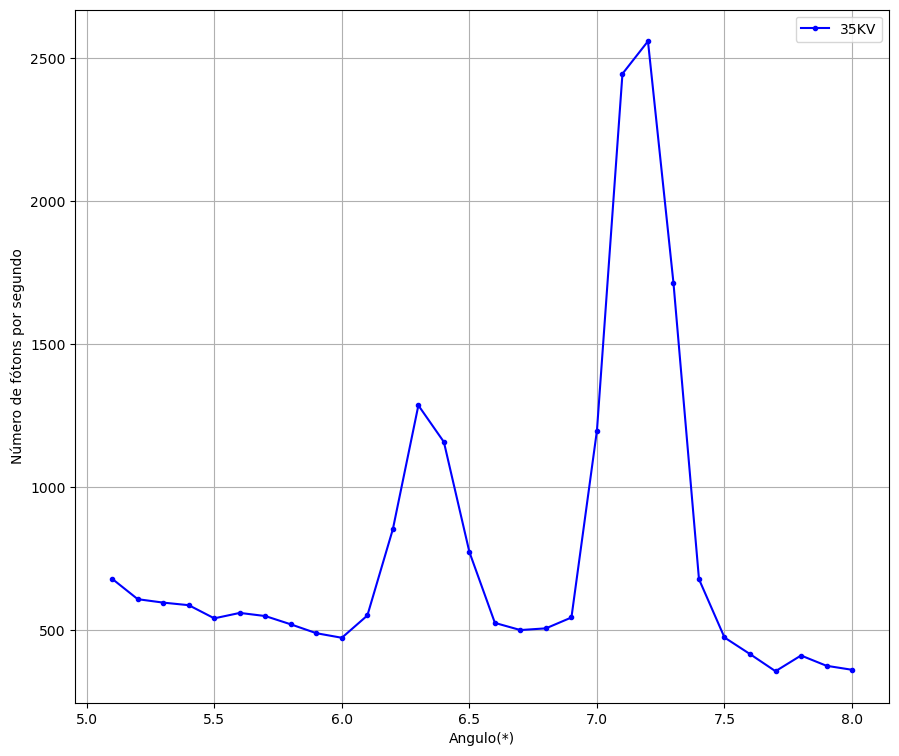

[2.12443994e-02 7.16949275e+00 2.62247125e+03] 
 [[ 6.23288846e-06 -3.55949519e-07 -1.90663993e-01]
 [-3.55949519e-07  6.99599415e-05  9.07694117e-03]
 [-1.90663993e-01  9.07694117e-03  1.70542603e+04]]


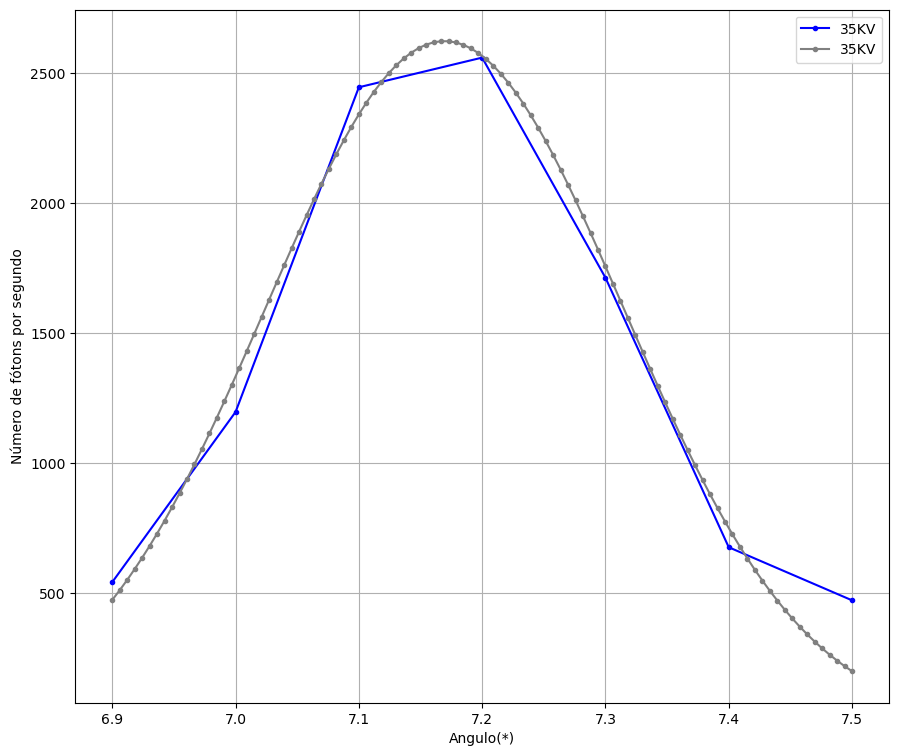

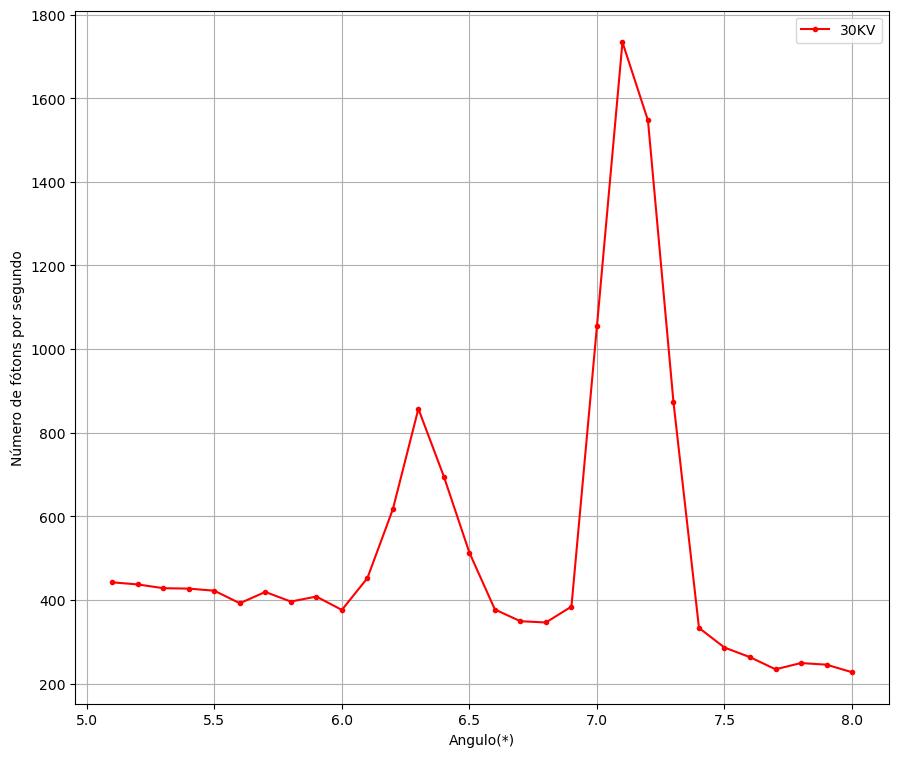

[2.06842972e-02 7.13520925e+00 1.72581396e+03] 
 [[ 7.84530376e-06  4.82328349e-07 -1.62254775e-01]
 [ 4.82328349e-07  9.06181870e-05 -8.33327250e-03]
 [-1.62254775e-01 -8.33327250e-03  9.82280041e+03]]


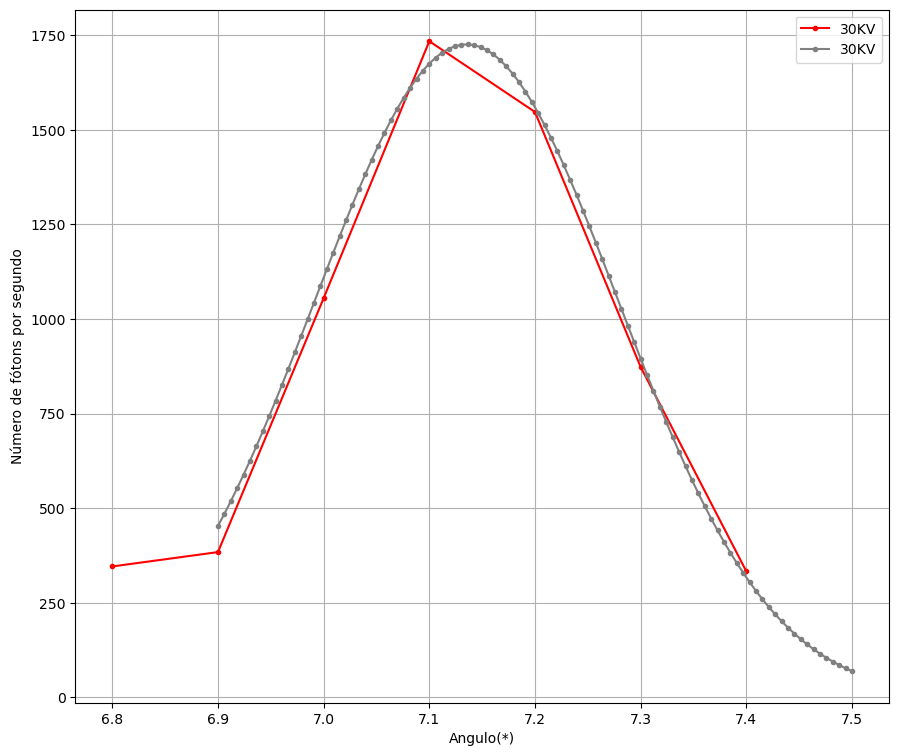

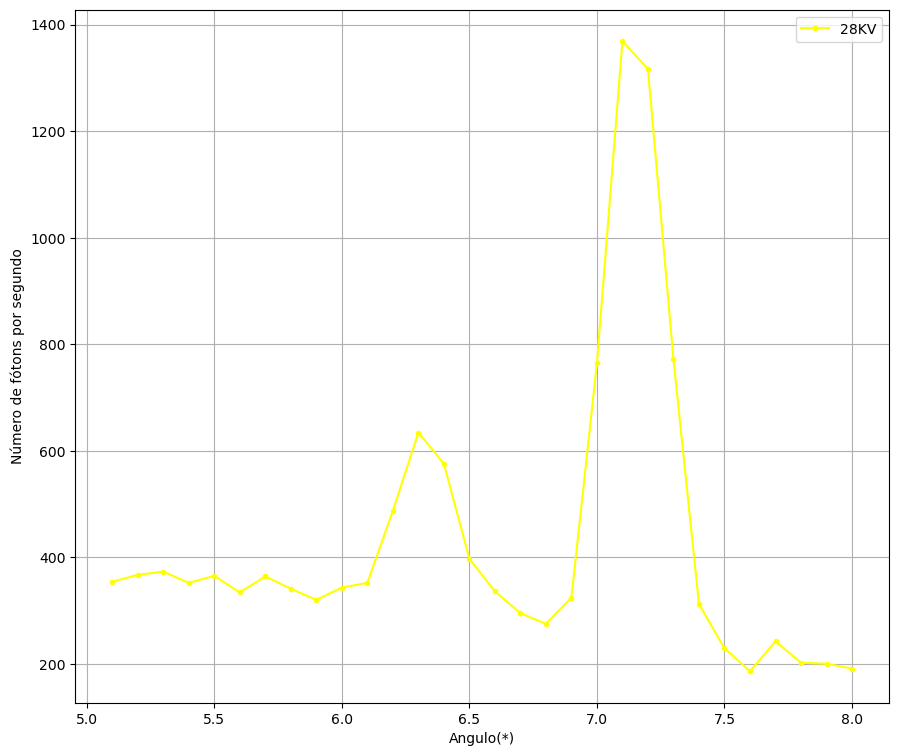

[2.12799982e-02 7.14640258e+00 1.39445023e+03] 
 [[ 8.91794734e-06  8.65261154e-07 -1.44212696e-01]
 [ 8.65261154e-07  9.85569856e-05 -1.15360968e-02]
 [-1.44212696e-01 -1.15360968e-02  6.77382257e+03]]


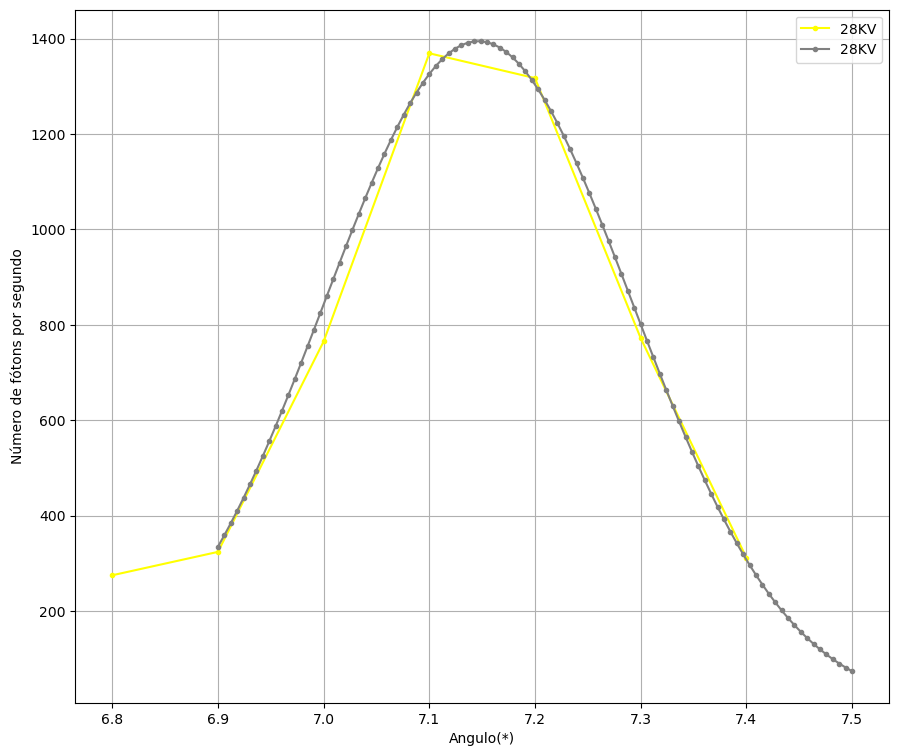

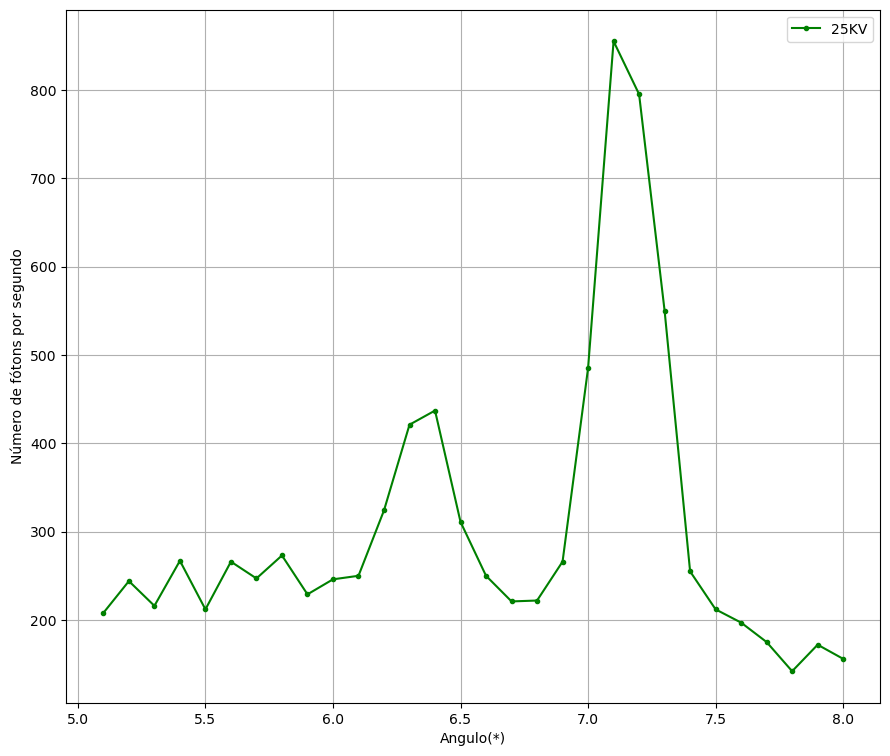

[2.82392327e-02 7.14805851e+00 8.33684403e+02] 
 [[ 2.39205749e-05  5.02205594e-06 -1.69289683e-01]
 [ 5.02205594e-06  1.82585817e-04 -2.76971079e-02]
 [-1.69289683e-01 -2.76971079e-02  3.34294985e+03]]


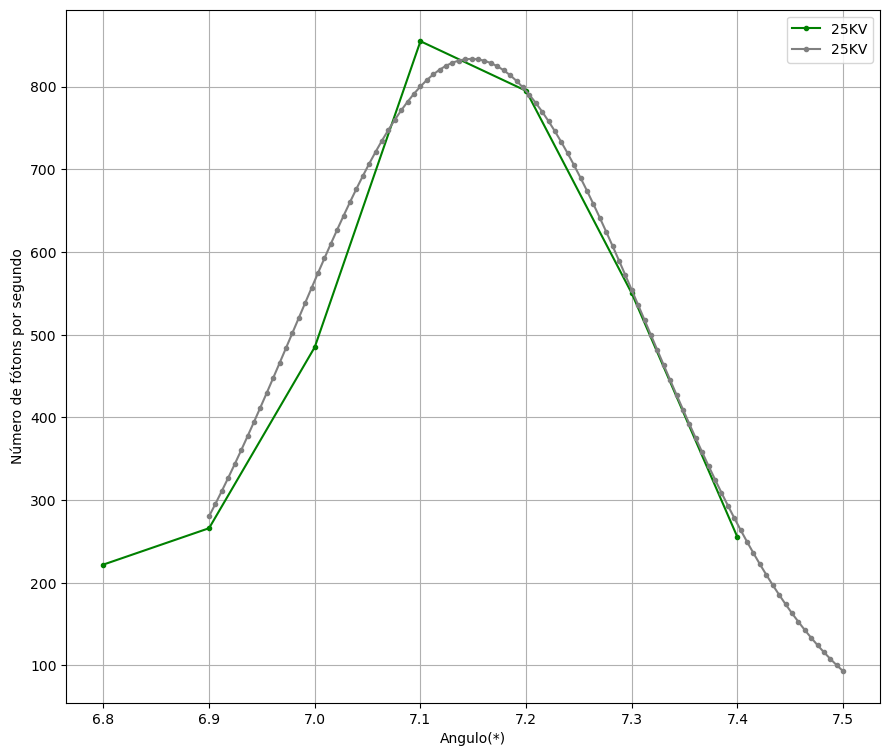

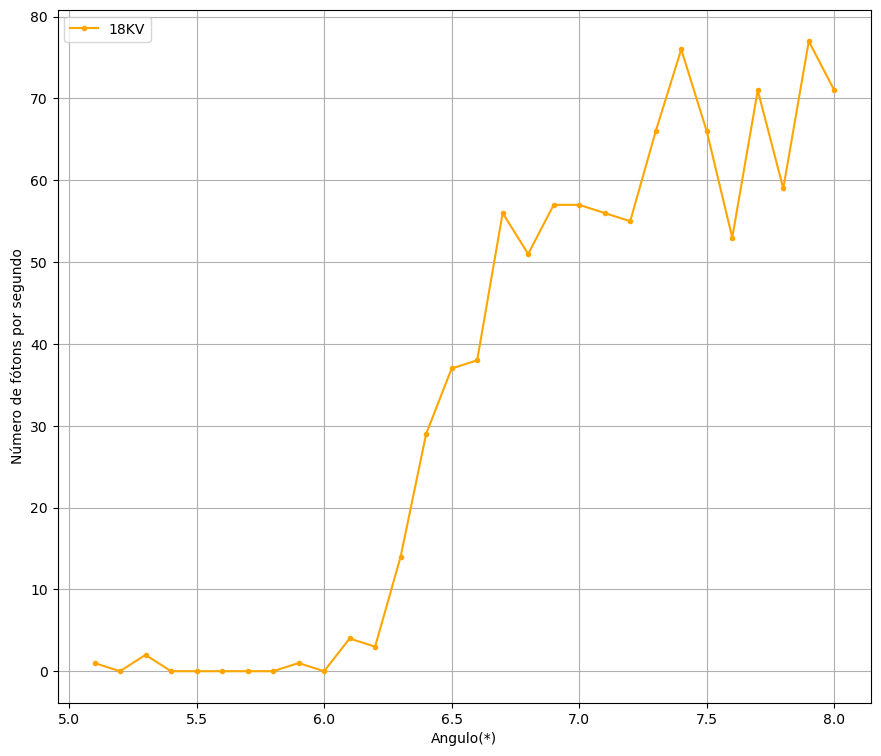

IndexError: list index out of range

In [22]:
cores = ['Blue', 'Red', 'Yellow', 'Green', 'Orange']
voltagens =['35KV', '30KV', '28KV', '25KV', '18KV']
grafs = ['B', 'C', 'D', 'E', 'F']
def AnalisePicos(cor, voltagem, graf):
    selecANG =[]
    selecNF = []
    def gauss(x, a, b, N):
        return N*np.exp((-(x-b)**2/(2*a)))
    
    for i in range(0, 275):
        if df['A'][i] >= 5.01  and df['A'][i] <= 8 :
            selecANG.append(df['A'][i])
            selecNF.append(df[graf][i])
    
    plt.figure(figsize=(10.5, 9))
    plt.plot(selecANG, selecNF, label=voltagem, marker='.', color=cor )
    plt.xlabel('Angulo(*)')
    plt.ylabel('Número de fótons por segundo')
    plt.grid()
    plt.legend()
    plt.show()
    
    print('vida')
    if cor == 'Orange':
        
        #calculo dos I_alfa e I_beta
        ListaOrdenadasPico1 = [] #lista das ordenadas dos pontos proximos ao pico 1
        ListaAbsPico1 = [] #lista das abissiças dos pontos proximos ao pico 1
        Npico1 = 0 #Posição (ou indice) das coordenadas do pico 1 nas lista selecANG e selecNF
        for i in range(len(selecNF)):
            if selecNF[i]==max(selecNF):
                Npico1 = i
        for i in range(7):
            ListaOrdenadasPico1 = ListaOrdenadasPico1 + [selecNF[Npico1-3+i]]
            ListaAbsPico1 = ListaAbsPico1 + [selecANG[Npico1-3+i]]

        poptP, pcovP = curve_fit(gauss, ListaAbsPico1, ListaOrdenadasPico1, bounds=([0, 7, 700], [1, 7.5, 3000])) #a, b, N

        print(poptP, '\n', pcovP)
        print('vida')
        #poptP é a lista dos valores dos parametros ajustados
        #pcovP é a matriz de covariancia. As incertezas são as raizesdos elementos da diagonal principal
        rgBL = np.linspace(6.9, 7.5, num = 100) #rgBL é um range continuo (100 pontos) entre 6.9 e 7.5

        plt.figure(figsize=(10.5, 9))
        plt.plot(ListaAbsPico1, ListaOrdenadasPico1, label=voltagem, marker='.', color=cor )
        plt.plot(rgBL, gauss(rgBL, *poptP), label=voltagem, marker='.', color='gray' )
        plt.xlabel('Angulo(*)')
        plt.ylabel('Número de fótons por segundo')
        plt.grid()
        plt.legend()
        plt.show()

        # Ajuste primitivo
    




for j in range(0, 5):
    raz(cor=cores[j], voltagem=voltagens[j], graf=grafs[j])

''

Obtenção da constante de Plank

In [23]:
def hgenerator():
    

SyntaxError: incomplete input (1142211010.py, line 2)